# Mushrooms

## pandas DataFrame & Exploratory Analysis

###  Task:

1. First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
2. Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
3. Add meaningful names for each column.
4. Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
5. Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
6. Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

##### Import library modules: 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

###### Create pandas DataFrame that reads mushroom data for specific columns:

In [3]:
mushroom_df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,5,9,22], names=["Edibility","Odor","Color","Habitat"])
mushroom_df

,Edibility,Odor,Color,Habitat
0,p,p,k,u
1,e,a,k,g
2,e,l,n,m
3,p,p,n,u
4,e,n,k,g
5,e,a,n,g
6,e,a,g,m
7,e,l,n,m
8,p,p,p,g
9,e,a,g,m


##### Utilize Python to transform letters to into numbers using an iterative loop and dictionary:

In [4]:
columns = [mushroom_df.Edibility,mushroom_df.Odor,mushroom_df.Color,mushroom_df.Habitat]
column_names = ["Edibility","Odor","Color","Habitat"]
transform_dict = {}
counter = 0
column_counter = 0
column_names_counter = 0
mushroom_num = pd.DataFrame()

for n in range(4):
    for odorType in columns[column_counter]:
        if odorType not in transform_dict:
            transform_dict[odorType] = counter
            counter += 1


    old_values = list(transform_dict.keys())
    new_values = list(transform_dict.values())
    
    mushroom_num[column_counter] = mushroom_df[[column_names_counter]].replace(old_values,new_values)
    
    column_counter += 1
    column_names_counter += 1
    counter = 0
    transform_dict = {}
    
mushroom_num.columns = column_names
mushroom_num

,Edibility,Odor,Color,Habitat
0,0,0,0,0
1,1,1,0,1
2,1,2,1,2
3,0,0,1,0
4,1,3,0,1
5,1,1,1,1
6,1,1,2,2
7,1,2,1,2
8,0,0,3,1
9,1,1,2,2


##### Check datatypes for each column to confirm integer or float value:

In [5]:
mushroom_num.dtypes

Edibility    int64
Odor         int64
Color        int64
Habitat      int64
dtype: object

As shown above, each column has a int64, or integer value, as its datatype.

##### Display a bar chart for distribution of edibility:

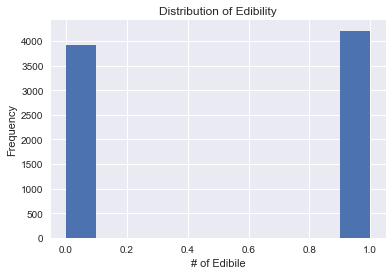

In [7]:
x = mushroom_num['Edibility'].values

plt.hist(x)
plt.title("Distribution of Edibility")
plt.xlabel("# of Edibile")
plt.ylabel("Frequency")
plt.show()

##### Display a bar chart for distribution of odor:

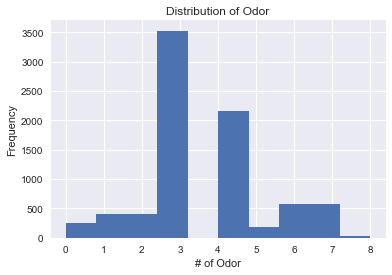

In [8]:
x = mushroom_num['Odor'].values

plt.hist(x)
plt.title("Distribution of Odor")
plt.xlabel("# of Odor")
plt.ylabel("Frequency")
plt.show()

##### Display bar chart for distribution of color:

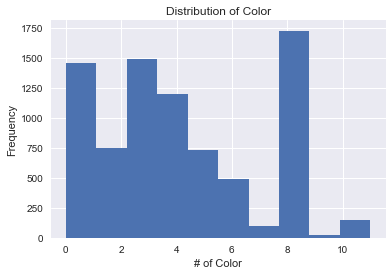

In [9]:
x = mushroom_num['Color'].values

plt.hist(x)
plt.title("Distribution of Color")
plt.xlabel("# of Color")
plt.ylabel("Frequency")
plt.show()

##### Display a bar chart for the distribution of habitat:

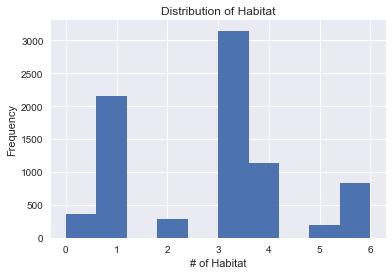

In [10]:
x = mushroom_num['Habitat'].values

plt.hist(x)
plt.title("Distribution of Habitat")
plt.xlabel("# of Habitat")
plt.ylabel("Frequency")
plt.show()

##### Display scatterplot to show relationship between edibility and odor:

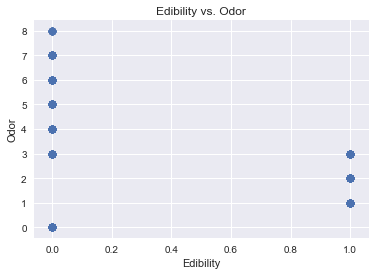

In [11]:
x = mushroom_num['Edibility'].values
y = mushroom_num['Odor'].values

plt.title("Edibility vs. Odor")
plt.xlabel("Edibility")
plt.ylabel("Odor")
plt.scatter(x,y)
plt.show()

##### Display scatterplot to show relationship between edibility and color:

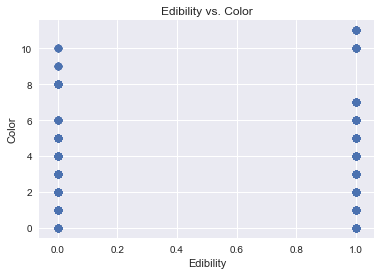

In [12]:
x = mushroom_num['Edibility'].values
y = mushroom_num['Color'].values

plt.title("Edibility vs. Color")
plt.xlabel("Edibility")
plt.ylabel("Color")
plt.scatter(x,y)
plt.show()

##### Display scatterplot to show relationship between edibility and habitat:

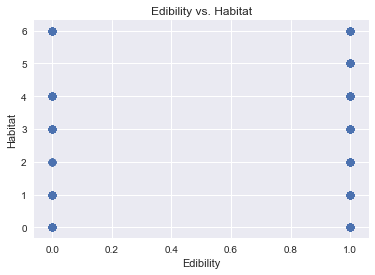

In [13]:
x = mushroom_num['Edibility'].values
y = mushroom_num['Habitat'].values

plt.title("Edibility vs. Habitat")
plt.xlabel("Edibility")
plt.ylabel("Habitat")
plt.scatter(x,y)
plt.show()

### Final Analysis: 

After looking at the color and habitat columns, it is hard to determine whether or not these columns will be helpful in predicting if a specific mushroom is edible or poisonous at first. Since we defined edible and poisonous as integers, however, the edible vs color shows a more accurate depiction than habitat vs edibility relative to the relationship displayed. Since the edibility vs habitat scatterplot shows similar data points for edible and poisonous, it seems difficult to compare and determine a prediction. The odor column shows the most indication as a predictor on whether or not a mushroom is edible or poisonous due to the disparity of edibile and poisonous data shown on the scatterplot. 